In [7]:
import pandas as pd

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
path = "/home/ubuntu/iris_repos/llm_evaluation_thesis/analysis/computing scores/Qasa 8-70b/qasa_70b_100.csv"
df = pd.read_csv(path)

In [10]:
df

,question,correct_answer,context,answer_70b,Rouge1,Rouge2,RougeL,Bleu,Chrf,Chrfplus,...,Bart,BEM,Prometheus,Consistency,TSim,Faithfullness,Relevancy,Correctness,RSim,LLM
0,How do these automated metrics for human prefe...,The automated metrics that are mentioned while...,The ultimate aim of language technology is to ...,They differ in models and consider factors lik...,0.032787,0.00000,0.032787,1.113892,18.174424,15.896805,...,0.007954,0.055791,3,0.75,2.0,1.000000,0.847055,0.447293,0.789172,0.8
1,What does non-differentiable mean here? If the...,A formal definition of non-differentiability h...,The ultimate aim of language technology is to ...,Flat ThompsonavaVER Outside Thompsonlingerling...,0.000000,0.00000,0.000000,0.259022,17.918299,13.438724,...,0.000132,0.070488,1,0.00,0.0,1.000000,0.733287,0.554103,0.716413,0.0
2,Why is the action space of language modeling p...,The action space for language modeling is equa...,Language generation action spaces are orders o...,vocab size.,0.000000,0.00000,0.000000,0.328905,3.506758,3.169533,...,0.001298,0.156081,3,1.00,1.0,1.000000,0.811153,0.628461,0.799575,0.0
3,What are actor-critic algorithms and how do th...,Actor critic models are a class of reinforceme...,RL4LMs supports fine-tuning and training LMs f...,Actor-critic algorithms combine policy and val...,0.162162,0.00000,0.108108,1.755738,30.339121,25.307181,...,0.035813,0.476195,3,0.50,2.0,0.333333,0.958780,0.519959,0.879835,0.8
4,What do the equations for Q-value and value re...,Q and V are mathematically expressed as: V_{t}...,RL4LMs supports fine-tuning and training LMs f...,Expected discounted rewards.,0.000000,0.00000,0.000000,0.161811,9.109887,7.804297,...,0.003476,0.068723,3,1.00,1.0,NaN,0.742857,0.204137,0.816508,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"How does the choice of layers, in which to dow...","As we can see, downsampling aim to collect sum...",Strategy 3. Downsample late in the network so ...,It controls their height and width.,0.031746,0.00000,0.031746,0.454572,8.851147,7.662987,...,0.006644,0.046927,3,0.50,1.0,1.000000,0.784161,0.394600,0.721259,0.0
96,Why did the authors use a mix of 1x1 and 3x3 f...,Authors used a mix of 1x1 and 3x3 filters in t...,Strategy 2. Decrease the number of input chann...,To limit input channels to 3x3 filters.,0.142857,0.05042,0.142857,1.309209,16.294097,16.121103,...,0.052065,0.110869,3,1.00,1.0,1.000000,0.862191,0.858768,0.863645,0.8
97,What is the total number of filters in squeeze...,s1x1 is the number of filters in the squeeze l...,We define the Fire module as follows.A Fire mo...,s_{1x1}.,0.000000,0.00000,0.000000,0.760550,3.217521,3.490909,...,0.040018,0.188542,3,1.00,2.0,1.000000,0.717997,0.806228,0.824705,1.0
98,The Caffe framework does not natively support ...,The additional cost of using 2 convolutional l...,\bulletSo that the output activations from 1x1...,Zero-padding.,0.000000,0.00000,0.000000,0.468334,4.767222,4.359812,...,0.003956,0.052229,1,1.00,0.0,0.500000,0.778750,0.437998,0.751992,0.0


In [11]:
df.columns

Index(['question', 'correct_answer', 'context', 'answer_70b', 'Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'Chrfplus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'Bart', 'BEM', 'Prometheus',
       'Consistency', 'TSim', 'Faithfullness', 'Relevancy', 'Correctness',
       'RSim', 'LLM'],
      dtype='object')

In [12]:
columns_of_interest = ['Rouge1',
       'Rouge2', 'RougeL', 'Bleu', 'Chrf', 'Chrfplus', 'Meteor', 'Ter', 'Bert',
       'WMS', 'SMS', 'Wisdm', 'Bleurt', 'BEM', 'Bart', 'Prometheus',
       'Faithfullness', 'Relevancy', 'Correctness', 'RSim', 'Consistency',
       'TSim', 'LLM']
selected_columns_df = df[columns_of_interest]
pearson_correlation_matrix = selected_columns_df.corr()
spearman_correlation_matrix = selected_columns_df.corr(method='spearman')

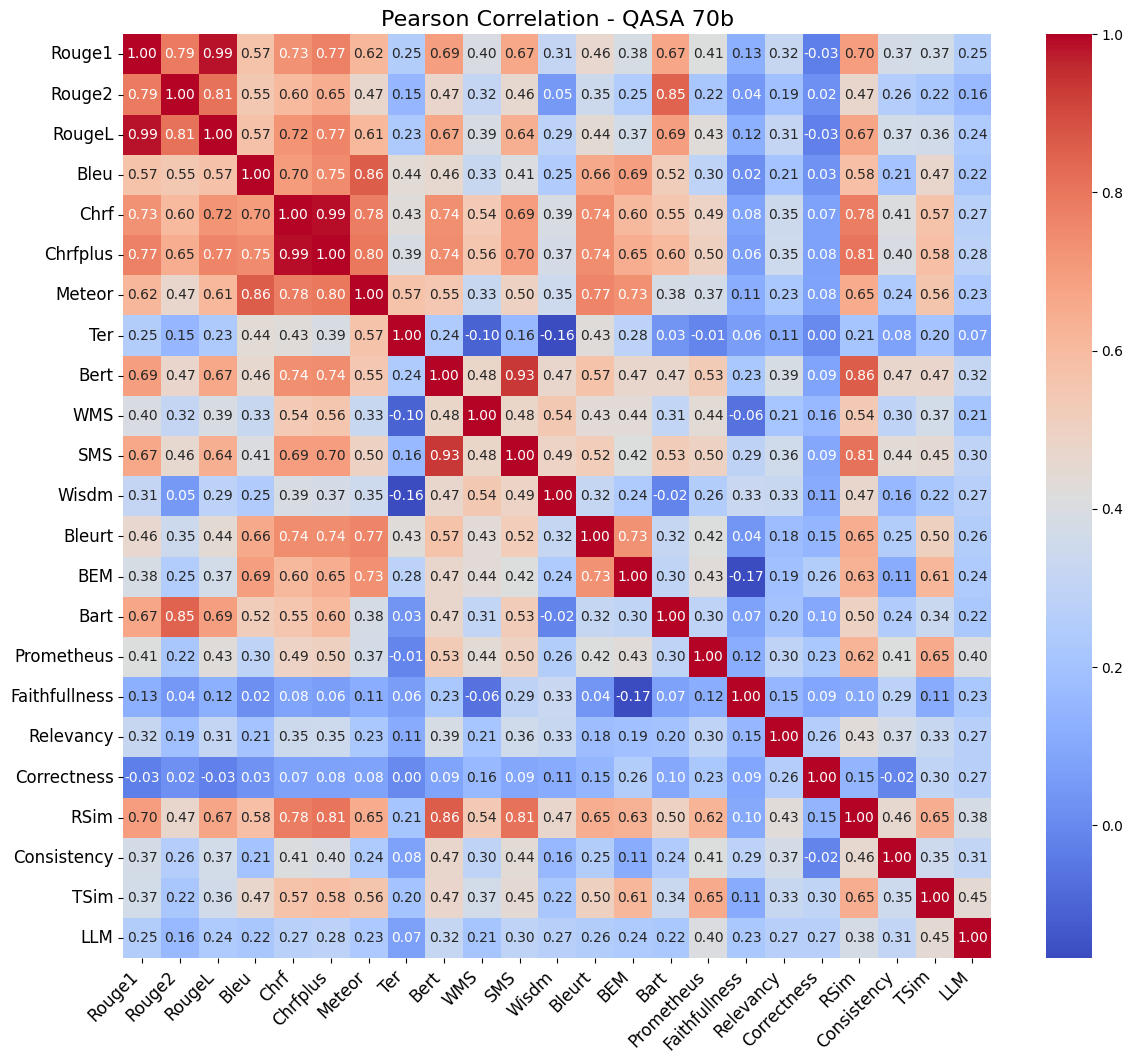

In [13]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Pearson Correlation - QASA 70b', fontsize=16)  # Adjust title size
plt.show()

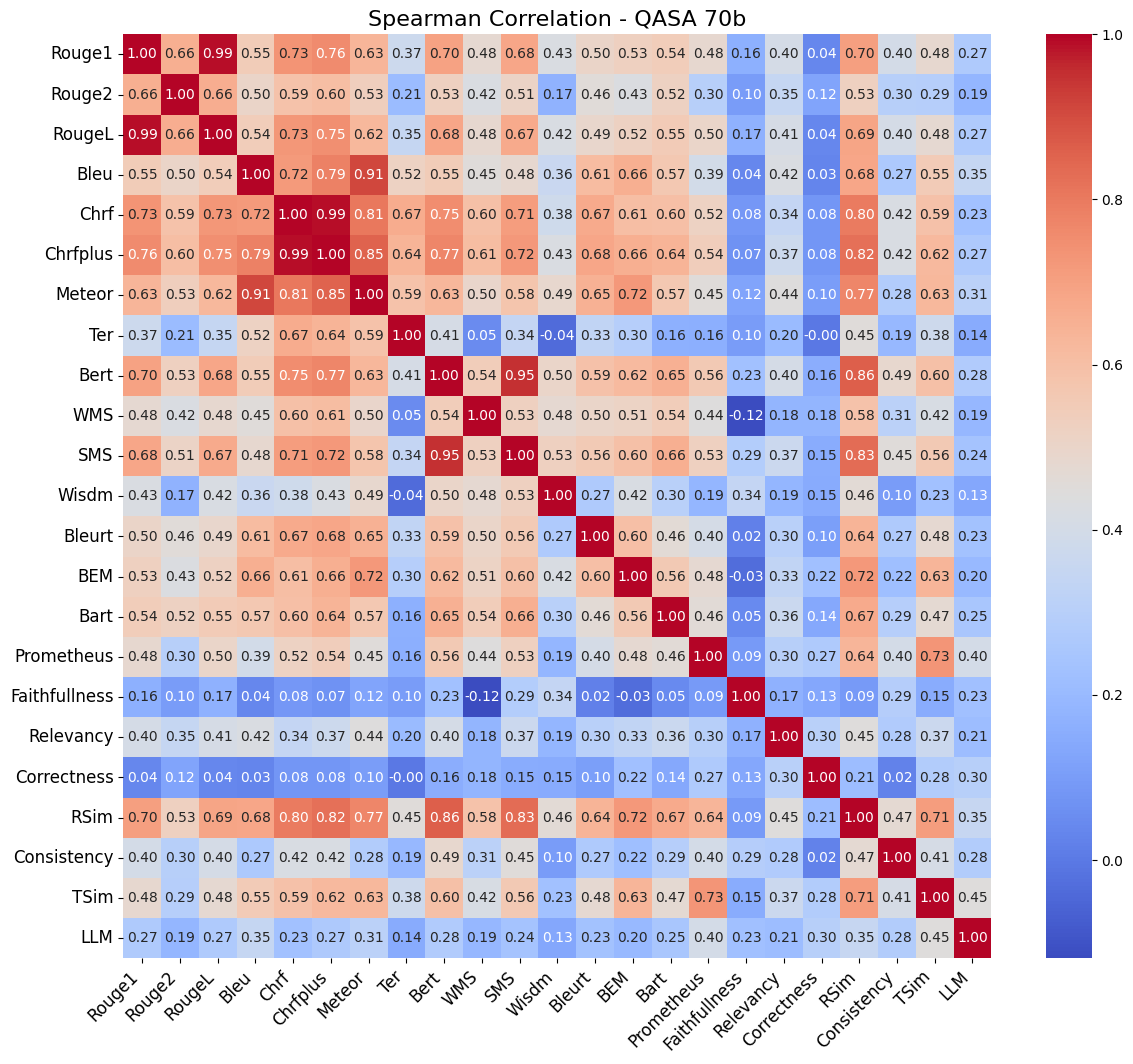

In [14]:
plt.figure(figsize=(14, 12))  # Increase the figure size

sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            annot_kws={"size": 10},  # Adjust the font size of the annotations
            xticklabels=pearson_correlation_matrix.columns,
            yticklabels=pearson_correlation_matrix.columns)

plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)  # Set y-axis labels font size

plt.title('Spearman Correlation - QASA 70b', fontsize=16)  # Adjust title size
plt.show()